Notebook with a correlation analysis of the probabilities from this study and p-values obtained in a previous study based on GO terms.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr
from tqdm.auto import tqdm

In [2]:
fig_path = Path('figures')
fig_path.mkdir(exist_ok=True, parents=True)

In [3]:
tqdm.pandas()

In [4]:
dfs = []

for i in tqdm(range(100)):
    df = pd.read_csv(f'results_multiseed/results_{i}.csv')
    dfs.append(df)

df = pd.concat(dfs).groupby(['Gen', 'Phn']).agg('mean').reset_index()
df = df.rename(columns={'p': 'proba'})
df

  0%|          | 0/100 [00:00<?, ?it/s]

,Gen,Phn,proba
0,A1CF,C1007,0.087234
1,A1CF,C1010,0.035111
2,A1CF,C1052,0.070773
3,A1CF,C1067,0.016427
4,A1CF,C1068,0.016052
...,...,...,...
899635,sep-15,L2003,0.001718
899636,sep-15,L2004,0.001608
899637,sep-15,L2005,0.003763
899638,sep-15,L2006,0.002171


In [5]:
pval = pd.read_csv('data/PvalGenFrm.csv', index_col=0)
pval

,C1007,C1010,C1052,C1067,C1068,C1069,C1080,D1071,D1072,D1073,...,D1720,D1725,H3000,L2000,L2001,L2002,L2003,L2004,L2005,L2006
A1BG,0.015260,0.033936,0.024465,0.009954,0.017598,0.016716,0.000394,0.033000,4.200000e-03,0.0059,...,0.0320,0.0520,0.004130,0.00110,0.00430,0.02700,0.0150,0.00025,0.00099,0.00690
A1BG-AS1,0.107584,0.033936,0.054779,0.009954,0.017598,0.010538,0.010430,0.033000,4.200000e-03,0.0059,...,0.0430,0.0520,0.004130,0.00110,0.00430,0.02700,0.0150,0.00034,0.00099,0.00690
A1CF,0.002029,0.001396,0.005065,0.011311,0.037745,0.028450,0.000009,0.004800,6.400000e-03,0.0110,...,0.0120,0.0027,0.000314,0.00380,0.00180,0.02500,0.0025,0.00150,0.00530,0.00920
A2M,0.037412,0.007708,0.012106,0.020634,0.000364,0.004140,0.010497,0.012000,2.400000e-06,0.0061,...,0.0200,0.0110,0.012417,0.00094,0.00130,0.00730,0.0015,0.00540,0.00490,0.00062
A2M-AS1,0.090107,0.007708,0.012106,0.073386,0.000364,0.006357,0.026469,0.034000,2.500000e-07,0.0066,...,0.0200,0.0110,0.012417,0.00460,0.00130,0.00730,0.0033,0.00540,0.00490,0.00120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11AP1,0.032217,0.008297,0.095441,0.268324,0.001759,0.008430,0.223344,0.036000,6.700000e-02,0.0210,...,0.1800,0.1000,0.022594,0.04600,0.03700,0.02300,0.0340,0.01800,0.03400,0.01200
ZYG11B,0.006403,0.004135,0.003707,0.000950,0.013315,0.028952,0.028226,0.000250,4.900000e-02,0.0160,...,0.0086,0.0020,0.001245,0.00700,0.00120,0.00700,0.0019,0.00490,0.00160,0.00053
ZYXP1,0.004447,0.039029,0.021930,0.034819,0.009717,0.037183,0.004327,0.018000,1.000000e-03,0.0180,...,0.2100,0.1000,0.051050,0.06600,0.02400,0.00018,0.0071,0.00110,0.00310,0.03700
ZZEF1,0.011385,0.015092,0.001959,0.008431,0.007263,0.005147,0.001542,0.000039,8.000000e-03,0.0011,...,0.0024,0.0230,0.001294,0.00098,0.00064,0.00180,0.0022,0.00470,0.00065,0.00028


In [6]:
def map_pval(row):
    gen = row['Gen']
    phn = row['Phn']
    
    try:
        return -np.log10(pval.loc[gen][phn])
    except:
        return np.nan

In [7]:
df['-log10(p-val)'] = df.progress_apply(map_pval, axis=1)

  0%|          | 0/899640 [00:00<?, ?it/s]

In [8]:
df

,Gen,Phn,proba,-log10(p-val)
0,A1CF,C1007,0.087234,2.692821
1,A1CF,C1010,0.035111,2.855202
2,A1CF,C1052,0.070773,2.295394
3,A1CF,C1067,0.016427,1.946499
4,A1CF,C1068,0.016052,1.423137
...,...,...,...,...
899635,sep-15,L2003,0.001718,NaN
899636,sep-15,L2004,0.001608,NaN
899637,sep-15,L2005,0.003763,NaN
899638,sep-15,L2006,0.002171,NaN


In [9]:
df = df.dropna()
df

,Gen,Phn,proba,-log10(p-val)
0,A1CF,C1007,0.087234,2.692821
1,A1CF,C1010,0.035111,2.855202
2,A1CF,C1052,0.070773,2.295394
3,A1CF,C1067,0.016427,1.946499
4,A1CF,C1068,0.016052,1.423137
...,...,...,...,...
898410,ZZZ3,L2002,0.000899,2.958607
898411,ZZZ3,L2003,0.000935,2.000000
898412,ZZZ3,L2004,0.001833,2.136677
898413,ZZZ3,L2005,0.003161,2.148742


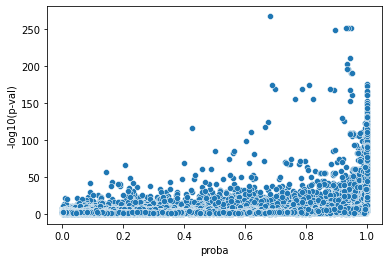

In [10]:
sns.scatterplot(data=df, x='proba', y='-log10(p-val)')

plt.savefig(fig_path / 'scatter_corr_pval_prob_multiseed.pdf')

In [11]:
pearsonr(df['proba'], df['-log10(p-val)'])

(0.3048800265984404, 0.0)

In [12]:
for phn in df['Phn'].unique():
    dx = df[df['Phn'] == phn]
    corr = np.corrcoef(dx['proba'], dx['-log10(p-val)'])[0, 1]
    
    print(phn, corr)

C1007 0.016227452146488876
C1010 0.36637650471842204
C1052 0.0989932203122147
C1067 0.3009386535419837
C1068 0.41224701067374053
C1069 0.40957387329710726
C1080 0.17772680502070756
D1071 0.24394610499212996
D1073 0.14794062801856459
D1074 0.487224449964231
D1075 0.5068992082201592
D1076 0.22173018403068975
D1077 0.24547800400906897
D1082 0.2513807131119507
D1085 0.23938398142780024
D1091 0.2640849561144029
D1092 0.22956307086222735
D1094 0.1153426646478649
D1095 0.03507961420255357
D1111 0.2610891752693129
D1112 0.22442619336070727
D1153 0.4974871968029047
D1154 -0.03716436510604013
D1155 0.4765993371394282
D1156 0.22490434504945908
D1159 0.4956948216404671
D1182 0.24414472486035665
D1183 0.23769166098290623
D1218 -0.00376350063136498
D1222 0.019948406621690108
D1245 0.23681498158009995
D1248 0.0164511204370577
D1249 0.4752194080451785
D1250 0.48701556515999667
D1251 0.4512743401587208
D1268 0.14172355788232724
D1269 0.44872736417254633
D1280 -0.011907663229036202
D1284 0.3734810747149

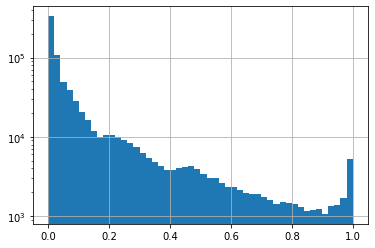

In [13]:
df['proba'].hist(bins=50, log=True)

plt.savefig(fig_path / 'hist_corr_prob_multiseed.pdf')

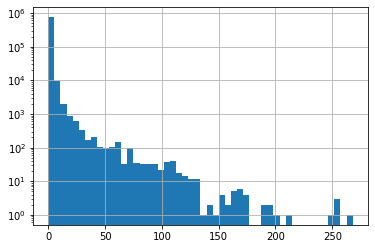

In [14]:
df['-log10(p-val)'].hist(bins=50, log=True)

plt.savefig(fig_path / 'hist_corr_pval_multiseed.pdf')